In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
df = pd.read_csv("C:\\Users\\mikey\\OneDrive\\Documents\\ITCS-3162 Data Mining\\data.csv")

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='count'>

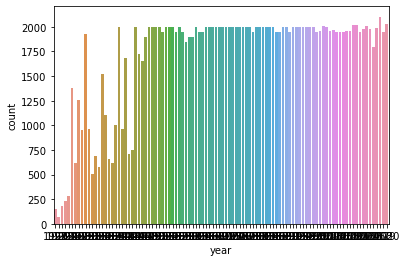

In [5]:
sns.countplot(data=df, x='year')

<AxesSubplot:xlabel='danceability', ylabel='count'>

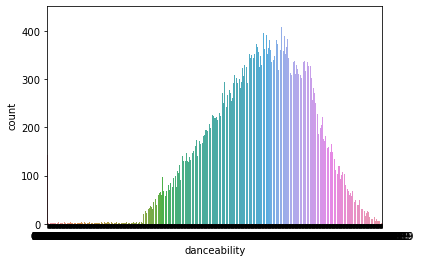

In [6]:
sns.countplot(data=df, x='danceability')

<AxesSubplot:xlabel='danceability', ylabel='liveness'>

C:\Users\mikey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


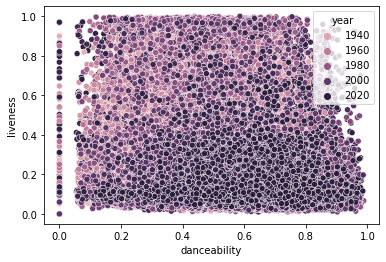

In [7]:
sns.scatterplot(x='danceability', y='liveness', hue='year', data=df)

<AxesSubplot:>

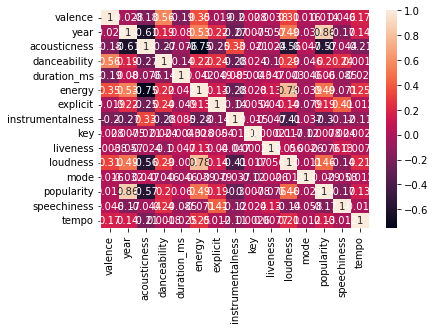

In [8]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='danceability', ylabel='valence'>

C:\Users\mikey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


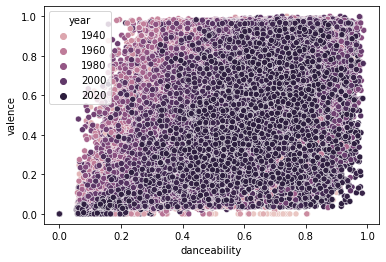

In [9]:
sns.scatterplot(x='danceability', y='valence', hue='year', data=df)

<AxesSubplot:xlabel='popularity', ylabel='energy'>

C:\Users\mikey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


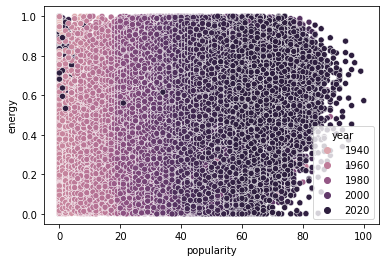

In [10]:
sns.scatterplot(x='popularity', y='energy', hue='year', data=df)

In [11]:
X = df[['popularity','energy','valence','danceability']]

In [12]:
#Create PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

In [13]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'Variance')

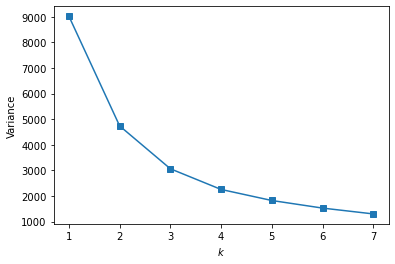

In [14]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [15]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

In [16]:
y = kmeans.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

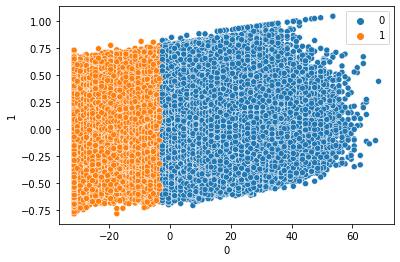

In [17]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

<AxesSubplot:xlabel='popularity', ylabel='energy'>

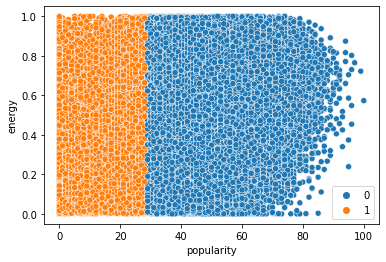

In [18]:
sns.scatterplot(x = df['popularity'], y = df['energy'], hue=y)

In [19]:
subset = df.sample(n=1000)

<AxesSubplot:xlabel='year', ylabel='count'>

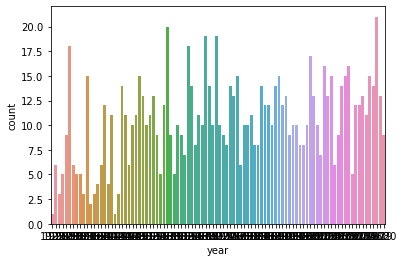

In [20]:
sns.countplot(data=subset, x='year')

<AxesSubplot:xlabel='danceability', ylabel='liveness'>

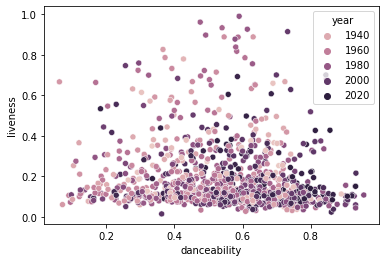

In [21]:
sns.scatterplot(x='danceability', y='liveness', hue='year', data=subset)

<AxesSubplot:xlabel='popularity', ylabel='energy'>

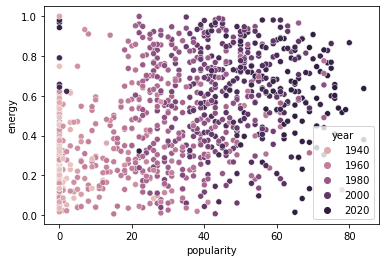

In [22]:
sns.scatterplot(x='popularity', y='energy', hue='year', data=subset)

<AxesSubplot:xlabel='danceability', ylabel='valence'>

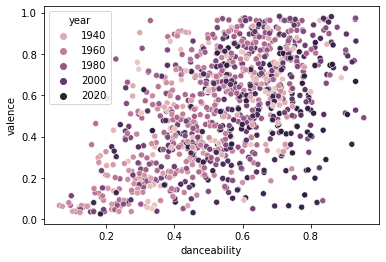

In [23]:
sns.scatterplot(x='danceability', y='valence', hue='year', data=subset)

In [24]:
X = subset[['popularity','energy','valence','year']]

In [25]:
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

In [26]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

C:\Users\mikey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0, 0.5, 'Variance')

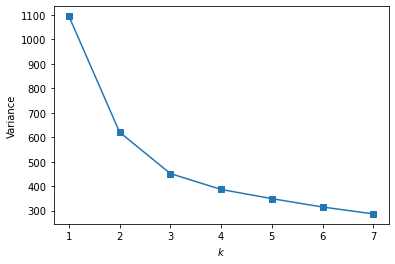

In [27]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [28]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

In [29]:
y = kmeans.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

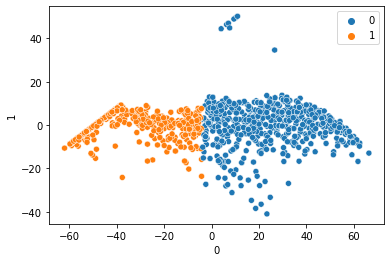

In [30]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

<AxesSubplot:xlabel='year', ylabel='energy'>

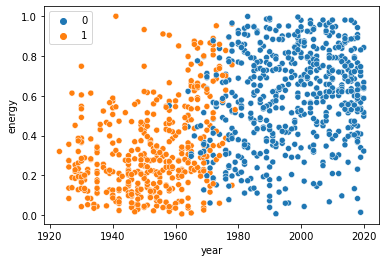

In [31]:
sns.scatterplot(x = subset['year'], y = subset['energy'], hue=y)

<AxesSubplot:xlabel='year', ylabel='danceability'>

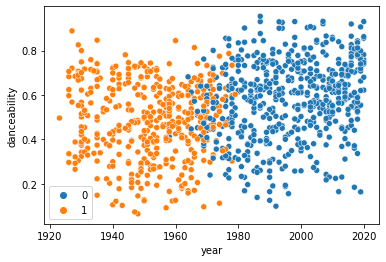

In [32]:
sns.scatterplot(x = subset['year'], y = subset['danceability'], hue=y)

<AxesSubplot:>

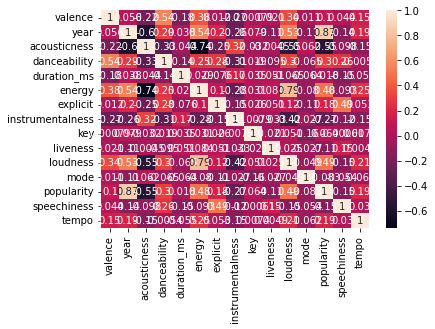

In [33]:
sns.heatmap(subset.corr(), annot=True)